# Description

TODO

# Modules

In [1]:
# %load_ext rpy2.ipython

In [2]:
import json
import tempfile
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from clustermatch import conf

# Settings

In [3]:
# DATASET_CONFIG = conf.GTEX
# GTEX_TISSUE = "whole_blood"
# GENE_SEL_STRATEGY = "var_pc_log2"

In [4]:
N_TOP_GENE_PAIRS = 100

In [5]:
# CLUSTERMATCH_LABEL = "Clustermatch"
# PEARSON_LABEL = "Pearson"
# SPEARMAN_LABEL = "Spearman"

# Paths

In [6]:
assert (
    conf.MANUSCRIPT["BASE_DIR"] is not None and conf.MANUSCRIPT["BASE_DIR"].exists()
), "Manuscript dir not set"

In [7]:
COEF_COMP_DIR = conf.MANUSCRIPT["FIGURES_DIR"] / "coefs_comp"
COEF_COMP_DIR.mkdir(parents=True, exist_ok=True)
display(COEF_COMP_DIR)

PosixPath('/opt/manuscript/content/images/coefs_comp')

In [8]:
OUTPUT_FIGURE_DIR = COEF_COMP_DIR / "giant_networks"
OUTPUT_FIGURE_DIR.mkdir(parents=True, exist_ok=True)
display(OUTPUT_FIGURE_DIR)

PosixPath('/opt/manuscript/content/images/coefs_comp/giant_networks')

In [9]:
# INPUT_DIR = DATASET_CONFIG["GENE_PAIR_INTERSECTIONS"]
# display(INPUT_DIR)

# assert INPUT_DIR.exists()

In [10]:
OUTPUT_DIR = conf.GIANT["RESULTS_DIR"] / "intersection_genes"
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
display(OUTPUT_DIR)

PosixPath('/opt/data/results/giant/intersection_genes')

# Summarize

In [11]:
all_subsets_dfs = []

## Clustermatch vs Pearson

In [12]:
subset = "clustermatch_vs_pearson"

In [13]:
subset_files = sorted(list((OUTPUT_DIR / subset).glob("*.h5")))
display(len(subset_files))
display(subset_files[:3])

100

[PosixPath('/opt/data/results/giant/intersection_genes/clustermatch_vs_pearson/000-tbcc_ifng.h5'),
 PosixPath('/opt/data/results/giant/intersection_genes/clustermatch_vs_pearson/002-ccl18_zdhhc12.h5'),
 PosixPath('/opt/data/results/giant/intersection_genes/clustermatch_vs_pearson/004-glipr1_ifng.h5')]

In [14]:
_dfs = [
    pd.read_hdf(f, key="data").assign(
        gene_pair=f.name.split("-")[1].split(".")[0].upper(),
        tissue=pd.read_hdf(f, key="metadata")["tissue"].squeeze(),
        subset=subset,
    )
    for f in subset_files
]

display(_dfs[0].head())
all_subsets_dfs.extend(_dfs)
display(len(all_subsets_dfs))

,gene1,gene2,weight,gene_pair,tissue,subset
0,CLP1,ZNF207,0.282636,TBCC_IFNG,nervous-system,clustermatch_vs_pearson
1,CLP1,CXCR6,0.038849,TBCC_IFNG,nervous-system,clustermatch_vs_pearson
2,CLP1,RNF113A,0.136710,TBCC_IFNG,nervous-system,clustermatch_vs_pearson
3,CLP1,MOAP1,0.085126,TBCC_IFNG,nervous-system,clustermatch_vs_pearson
4,CLP1,MRFAP1L1,0.137168,TBCC_IFNG,nervous-system,clustermatch_vs_pearson


100

## Clustermatch vs Pearson/Spearman

In [15]:
subset = "clustermatch_vs_pearson_spearman"

In [16]:
subset_files = sorted(list((OUTPUT_DIR / subset).glob("*.h5")))
display(len(subset_files))
display(subset_files[:3])

2

[PosixPath('/opt/data/results/giant/intersection_genes/clustermatch_vs_pearson_spearman/000-dnajc5_gtpbp1.h5'),
 PosixPath('/opt/data/results/giant/intersection_genes/clustermatch_vs_pearson_spearman/004-cyth4_gtpbp1.h5')]

In [17]:
_dfs = [
    pd.read_hdf(f, key="data").assign(
        gene_pair=f.name.split("-")[1].split(".")[0].upper(),
        tissue=pd.read_hdf(f, key="metadata")["tissue"].squeeze(),
        subset=subset,
    )
    for f in subset_files
]

display(_dfs[0].head())
all_subsets_dfs.extend(_dfs)
display(len(all_subsets_dfs))

,gene1,gene2,weight,gene_pair,tissue,subset
0,NPRL3,NFKBIB,0.108910,DNAJC5_GTPBP1,central-nervous-system,clustermatch_vs_pearson_spearman
1,NPRL3,WIZ,0.185644,DNAJC5_GTPBP1,central-nervous-system,clustermatch_vs_pearson_spearman
2,NPRL3,ATP6V0C,0.209239,DNAJC5_GTPBP1,central-nervous-system,clustermatch_vs_pearson_spearman
3,NPRL3,NECTIN1,0.128082,DNAJC5_GTPBP1,central-nervous-system,clustermatch_vs_pearson_spearman
4,NPRL3,MINK1,0.165076,DNAJC5_GTPBP1,central-nervous-system,clustermatch_vs_pearson_spearman


102

## Clustermatch vs Spearman

In [18]:
subset = "clustermatch_vs_spearman"

In [19]:
subset_files = sorted(list((OUTPUT_DIR / subset).glob("*.h5")))
display(len(subset_files))
display(subset_files[:3])

24

[PosixPath('/opt/data/results/giant/intersection_genes/clustermatch_vs_spearman/000-kdm6a_uty.h5'),
 PosixPath('/opt/data/results/giant/intersection_genes/clustermatch_vs_spearman/001-cytip_kiaa0040.h5'),
 PosixPath('/opt/data/results/giant/intersection_genes/clustermatch_vs_spearman/002-cytip_rassf2.h5')]

In [20]:
_dfs = [
    pd.read_hdf(f, key="data").assign(
        gene_pair=f.name.split("-")[1].split(".")[0].upper(),
        tissue=pd.read_hdf(f, key="metadata")["tissue"].squeeze(),
        subset=subset,
    )
    for f in subset_files
]

display(_dfs[0].head())
all_subsets_dfs.extend(_dfs)
display(len(all_subsets_dfs))

,gene1,gene2,weight,gene_pair,tissue,subset
0,WAC,MORC3,0.416091,KDM6A_UTY,placenta,clustermatch_vs_spearman
1,WAC,DDX3X,0.357964,KDM6A_UTY,placenta,clustermatch_vs_spearman
2,WAC,PHF3,0.421210,KDM6A_UTY,placenta,clustermatch_vs_spearman
3,WAC,NIPBL,0.410458,KDM6A_UTY,placenta,clustermatch_vs_spearman
4,WAC,ITSN2,0.387687,KDM6A_UTY,placenta,clustermatch_vs_spearman


126

## Pearson vs Clustermatch

In [21]:
subset = "pearson_vs_clustermatch"

In [22]:
subset_files = sorted(list((OUTPUT_DIR / subset).glob("*.h5")))
display(len(subset_files))
display(subset_files[:3])

100

[PosixPath('/opt/data/results/giant/intersection_genes/pearson_vs_clustermatch/000-tnni2_myoz1.h5'),
 PosixPath('/opt/data/results/giant/intersection_genes/pearson_vs_clustermatch/001-mybpc2_tnni2.h5'),
 PosixPath('/opt/data/results/giant/intersection_genes/pearson_vs_clustermatch/002-myoz1_pygm.h5')]

In [23]:
_dfs = [
    pd.read_hdf(f, key="data").assign(
        gene_pair=f.name.split("-")[1].split(".")[0].upper(),
        tissue=pd.read_hdf(f, key="metadata")["tissue"].squeeze(),
        subset=subset,
    )
    for f in subset_files
]

display(_dfs[0].head())
all_subsets_dfs.extend(_dfs)
display(len(all_subsets_dfs))

,gene1,gene2,weight,gene_pair,tissue,subset
0,GVQW3,MYOZ1,0.106883,TNNI2_MYOZ1,skeletal-muscle,pearson_vs_clustermatch
1,GVQW3,TNNI2,0.114303,TNNI2_MYOZ1,skeletal-muscle,pearson_vs_clustermatch
2,GVQW3,MFSD2B,0.106883,TNNI2_MYOZ1,skeletal-muscle,pearson_vs_clustermatch
3,GVQW3,SBK3,0.114303,TNNI2_MYOZ1,skeletal-muscle,pearson_vs_clustermatch
4,GVQW3,DCDC2C,0.106883,TNNI2_MYOZ1,skeletal-muscle,pearson_vs_clustermatch


226

## Pearson vs Clustermatch/Spearman

In [24]:
subset = "pearson_vs_clustermatch_spearman"

In [25]:
subset_files = sorted(list((OUTPUT_DIR / subset).glob("*.h5")))
display(len(subset_files))
display(subset_files[:3])

100

[PosixPath('/opt/data/results/giant/intersection_genes/pearson_vs_clustermatch_spearman/000-ccl20_scgb3a1.h5'),
 PosixPath('/opt/data/results/giant/intersection_genes/pearson_vs_clustermatch_spearman/001-cxcl1_scgb3a1.h5'),
 PosixPath('/opt/data/results/giant/intersection_genes/pearson_vs_clustermatch_spearman/002-tnni2_tpm2.h5')]

In [26]:
_dfs = [
    pd.read_hdf(f, key="data").assign(
        gene_pair=f.name.split("-")[1].split(".")[0].upper(),
        tissue=pd.read_hdf(f, key="metadata")["tissue"].squeeze(),
        subset=subset,
    )
    for f in subset_files
]

display(_dfs[0].head())
all_subsets_dfs.extend(_dfs)
display(len(all_subsets_dfs))

,gene1,gene2,weight,gene_pair,tissue,subset
0,NFKBIA,CXCL2,0.921080,CCL20_SCGB3A1,mononuclear-phagocyte,pearson_vs_clustermatch_spearman
1,NFKBIA,TNFAIP3,0.988534,CCL20_SCGB3A1,mononuclear-phagocyte,pearson_vs_clustermatch_spearman
2,NFKBIA,TRAF1,0.523726,CCL20_SCGB3A1,mononuclear-phagocyte,pearson_vs_clustermatch_spearman
3,NFKBIA,IRF1,0.877891,CCL20_SCGB3A1,mononuclear-phagocyte,pearson_vs_clustermatch_spearman
4,NFKBIA,BCL2A1,0.960765,CCL20_SCGB3A1,mononuclear-phagocyte,pearson_vs_clustermatch_spearman


326

# Combine

In [27]:
df = pd.concat(all_subsets_dfs, ignore_index=True)

In [28]:
df.shape

(34584, 6)

In [29]:
df.head()

,gene1,gene2,weight,gene_pair,tissue,subset
0,CLP1,ZNF207,0.282636,TBCC_IFNG,nervous-system,clustermatch_vs_pearson
1,CLP1,CXCR6,0.038849,TBCC_IFNG,nervous-system,clustermatch_vs_pearson
2,CLP1,RNF113A,0.136710,TBCC_IFNG,nervous-system,clustermatch_vs_pearson
3,CLP1,MOAP1,0.085126,TBCC_IFNG,nervous-system,clustermatch_vs_pearson
4,CLP1,MRFAP1L1,0.137168,TBCC_IFNG,nervous-system,clustermatch_vs_pearson


# Stats

In [30]:
df_stats = df.groupby(["subset"])["gene_pair"].nunique()
display(df_stats)

subset
clustermatch_vs_pearson             100
clustermatch_vs_pearson_spearman      2
clustermatch_vs_spearman             24
pearson_vs_clustermatch             100
pearson_vs_clustermatch_spearman    100
Name: gene_pair, dtype: int64

In [31]:
assert df_stats["clustermatch_vs_pearson"] == N_TOP_GENE_PAIRS
assert df_stats["pearson_vs_clustermatch"] == N_TOP_GENE_PAIRS
assert df_stats["pearson_vs_clustermatch_spearman"] == N_TOP_GENE_PAIRS

# Combine subsets

In [32]:
subset_cm_vs_rest = "clustermatch_vs_rest"
subset_p_vs_rest = "pearson_vs_rest"

In [33]:
df = df.replace(
    {
        "subset": {
            "clustermatch_vs_pearson": subset_cm_vs_rest,
            "clustermatch_vs_spearman": subset_cm_vs_rest,
            "clustermatch_vs_pearson_spearman": subset_cm_vs_rest,
            "pearson_vs_clustermatch": subset_p_vs_rest,
            "pearson_vs_clustermatch_spearman": subset_p_vs_rest,
        },
    }
)

In [34]:
df.head()

,gene1,gene2,weight,gene_pair,tissue,subset
0,CLP1,ZNF207,0.282636,TBCC_IFNG,nervous-system,clustermatch_vs_rest
1,CLP1,CXCR6,0.038849,TBCC_IFNG,nervous-system,clustermatch_vs_rest
2,CLP1,RNF113A,0.136710,TBCC_IFNG,nervous-system,clustermatch_vs_rest
3,CLP1,MOAP1,0.085126,TBCC_IFNG,nervous-system,clustermatch_vs_rest
4,CLP1,MRFAP1L1,0.137168,TBCC_IFNG,nervous-system,clustermatch_vs_rest


In [35]:
assert df["subset"].unique().shape[0] == 2

# Analyses

In [36]:
plot_stats = df.groupby(["subset", "tissue"])["gene_pair"].nunique()

In [37]:
plot_stats.head()

subset                tissue                
clustermatch_vs_rest  b-lymphocyte               3
                      blood                     24
                      brain                      4
                      central-nervous-system     6
                      diencephalon               1
Name: gene_pair, dtype: int64

In [38]:
plot_stats = (
    plot_stats.groupby("subset").apply(lambda grp: grp.nlargest(5)).droplevel(0)
)

# by percentage
# plot_stats = plot_stats.groupby("subset").apply(lambda x: x / x.sum())

In [39]:
plot_stats

subset                tissue               
clustermatch_vs_rest  blood                    24
                      mononuclear-phagocyte    19
                      natural-killer-cell      15
                      leukocyte                12
                      macrophage               10
pearson_vs_rest       liver                    59
                      skeletal-muscle          58
                      blood                    20
                      placenta                 19
                      mononuclear-phagocyte     7
Name: gene_pair, dtype: int64

In [40]:
plot_stats.index.get_level_values("tissue").unique().shape

(8,)

In [41]:
plot_stats = plot_stats.reset_index()
display(plot_stats.head())

,subset,tissue,gene_pair
0,clustermatch_vs_rest,blood,24
1,clustermatch_vs_rest,mononuclear-phagocyte,19
2,clustermatch_vs_rest,natural-killer-cell,15
3,clustermatch_vs_rest,leukocyte,12
4,clustermatch_vs_rest,macrophage,10


In [42]:
plot_stats["subset"].unique()

array(['clustermatch_vs_rest', 'pearson_vs_rest'], dtype=object)

In [43]:
plot_stats["tissue"].unique()

array(['blood', 'mononuclear-phagocyte', 'natural-killer-cell',
       'leukocyte', 'macrophage', 'liver', 'skeletal-muscle', 'placenta'],
      dtype=object)

# Plots

In [63]:
PREDICTED_TISSUE_LABEL = "Predicted tissue/cell type\nin GIANT"
N_GENE_PAIRS_LABEL = "Number of gene pairs"
AVG_PROB_INTERACTION_LABEL = (
    "Average probability of interaction\nin tissue-specific networks"
)

## Tissues

In [64]:
subset_renames = {
    "clustermatch_vs_rest": "CCC vs others",
    # "clustermatch_vs_pearson_spearman": "CCC vs Pearson/Spearman",
    # "clustermatch_vs_spearman": "CCC vs Spearman",
    "pearson_vs_rest": "Pearson vs others",
    # "pearson_vs_clustermatch_spearman": "Pearson vs CCC/Spearman",
}

tissue_renames = {
    "blood": "Blood",
    "mononuclear-phagocyte": "Mononuclear phagocyte",
    "natural-killer-cell": "Natural killer cell",
    "leukocyte": "Leukocyte",
    "macrophage": "Macrophage",
    "central-nervous-system": "Central nervous system",
    "granulocyte": "Granulocyte",
    "b-lymphocyte": "B-lymphocyte",
    "skeletal-muscle": "Skeletal muscle",
    "liver": "Liver",
    "placenta": "Placenta",
    "renal-tubule": "Renal tubule",
    "placenta": "Placenta",
    "placenta": "Placenta",
}

In [65]:
plot_data = plot_stats.replace(
    {
        "subset": subset_renames,
        "tissue": tissue_renames,
    }
)

In [66]:
blood_related_tissues = set(
    [
        "Blood",
        "Mononuclear phagocyte",
        "Natural killer cell",
        "Leukocyte",
        "Macrophage",
        "Granulocyte",
        "B-lymphocyte",
    ]
)

In [67]:
tissues_order = [
    "Blood",
    "Mononuclear phagocyte",
    "Natural killer cell",
    "Leukocyte",
    "Macrophage",
    # "Granulocyte",
    # "B-lymphocyte",
    "Skeletal muscle",
    "Liver",
    "Placenta",
    # "Renal tubule",
    # "Central nervous system",
]

In [68]:
deep_colors = sns.color_palette("deep")
display(deep_colors)

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [69]:
blood_color = deep_colors[3]
others_color = deep_colors[0]

In [70]:
tissue_colors = {
    t: blood_color if t in blood_related_tissues else others_color
    for t in tissues_order
}

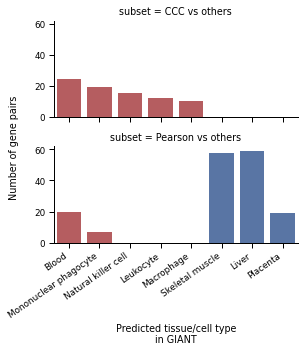

In [79]:
# first plot to show order of subset
with sns.plotting_context("paper", font_scale=1.0):
    g = sns.FacetGrid(
        plot_data,
        row="subset",
        sharex=True,
        sharey=True,
        height=2.0,
        aspect=2.1,
    )
    g.map(
        sns.barplot, "tissue", "gene_pair", order=tissues_order, palette=tissue_colors
    )
    g.set_xticklabels(rotation=35, ha="right")
    g.set_axis_labels(PREDICTED_TISSUE_LABEL, "")

    g.fig.text(0, 0.30, N_GENE_PAIRS_LABEL, rotation=90)

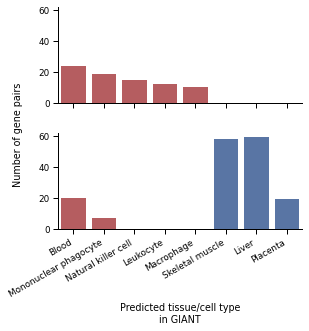

In [80]:
# now again without row titles and save the plot
with sns.plotting_context("paper", font_scale=1.0):
    g = sns.FacetGrid(
        plot_data,
        row="subset",
        sharex=True,
        sharey=True,
        height=2.0,
        aspect=2.1,
    )
    g.map(
        sns.barplot, "tissue", "gene_pair", order=tissues_order, palette=tissue_colors
    )
    g.set_xticklabels(rotation=30, ha="right")
    g.set_axis_labels(PREDICTED_TISSUE_LABEL, "")

    g.set_titles(row_template="")

    g.fig.text(0, 0.30, N_GENE_PAIRS_LABEL, rotation=90)

    g.savefig(
        OUTPUT_FIGURE_DIR / "top_gene_pairs-tissue_count.svg",
        bbox_inches="tight",
        dpi=300,
        # facecolor="white",
        transparent=True,
    )

## Connectivity

In [81]:
plot_data = pd.merge(
    df,
    plot_stats,
    left_on=["subset", "tissue"],
    right_on=["subset", "tissue"],
    how="inner",
)

In [82]:
plot_data = plot_data.replace(
    {
        "subset": subset_renames,
        "tissue": tissue_renames,
    }
)

In [83]:
plot_data.shape

(25518, 7)

In [84]:
plot_data.head()

,gene1,gene2,weight,gene_pair_x,tissue,subset,gene_pair_y
0,CCL3,SCAMP2,0.111008,CCL18_ZDHHC12,Macrophage,CCC vs others,10
1,CCL3,CCL5,0.500257,CCL18_ZDHHC12,Macrophage,CCC vs others,10
2,CCL3,HLA-DMB,0.788821,CCL18_ZDHHC12,Macrophage,CCC vs others,10
3,CCL3,GBP1,0.127745,CCL18_ZDHHC12,Macrophage,CCC vs others,10
4,CCL3,ZDHHC12,0.031800,CCL18_ZDHHC12,Macrophage,CCC vs others,10


In [85]:
# g = sns.catplot(data=plot_df, x="subset", y="weight", kind="box", orient="v", hue="tissue", height=5, aspect=1.5, sharex=False)
# g.set_xticklabels(rotation=30)

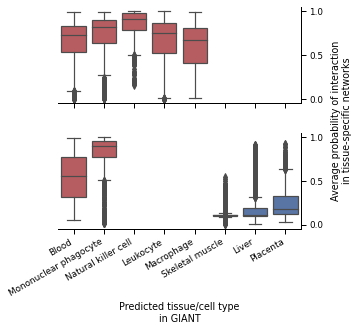

In [87]:
with sns.plotting_context("paper", font_scale=1.0):
    g = sns.FacetGrid(
        plot_data,
        row="subset",
        sharex=True,
        sharey=True,
        height=2.0,
        aspect=2.1,
    )
    g.map(sns.boxplot, "tissue", "weight", order=tissues_order, palette=tissue_colors)
    g.set_xticklabels(rotation=30, ha="right")
    g.set_axis_labels(PREDICTED_TISSUE_LABEL, "")

    g.set_titles(row_template="")

    for ax in g.axes:
        ax = ax[0]
        sns.despine(ax=ax, left=True, right=False)
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position("right")

    g.fig.text(1.09, 0.25, AVG_PROB_INTERACTION_LABEL, rotation=90, ha="center")
    # g.axes[2][0].set_ylabel(AVG_PROB_INTERACTION_LABEL)

    g.savefig(
        OUTPUT_FIGURE_DIR / "top_gene_pairs-tissue_avg_weight.svg",
        bbox_inches="tight",
        dpi=300,
        # facecolor="white",
        transparent=True,
    )

# Raw numbers

In [115]:
plot_data.groupby(["subset", "tissue"])["weight"].describe()

count      mean       std       min  \
subset            tissue                                                        
CCC vs others     Blood                  3041.0  0.658840  0.232505  0.004643   
                  Leukocyte              1528.0  0.657733  0.266221  0.001895   
                  Macrophage             1274.0  0.611683  0.264564  0.015116   
                  Mononuclear phagocyte  2467.0  0.720040  0.259112  0.005849   
                  Natural killer cell    1679.0  0.861559  0.151759  0.164965   
Pearson vs others Blood                  2356.0  0.543123  0.257628  0.048062   
                  Liver                  5733.0  0.175588  0.144261  0.002845   
                  Mononuclear phagocyte   910.0  0.807049  0.234952  0.016067   
                  Placenta               1720.0  0.252025  0.179206  0.025589   
                  Skeletal muscle        4810.0  0.115079  0.036554  0.011840   

                                              25%       50%       75%  \
subset            tissue                                                
CCC vs others     Blood                  0.539424  0.734192  0.836366   
                  Leukocyte              0.522502  0.749518  0.864410   
                  Macrophage             0.416022  0.677881  0.813124   
                  Mononuclear phagocyte  0.639847  0.824591  0.896281   
                  Natural killer cell    0.789673  0.916784  0.981061   
Pearson vs others Blood                  0.315782  0.559009  0.773824   
                  Liver                  0.104278  0.115981  0.190837   
                  Mononuclear phagocyte  0.773291  0.899533  0.954558   
                  Placenta               0.117522  0.175670  0.323171   
                  Skeletal muscle        0.103555  0.107855  0.114303   

                                              max  
subset            tissue                           
CCC vs others     Blood                  0.992412  
                  Leukocyte              0.998099  
                  Macrophage             0.993414  
                  Mononuclear phagocyte  0.994341  
                  Natural killer cell    0.999793  
Pearson vs others Blood                  0.988633  
                  Liver                  0.905517  
                  Mononuclear phagocyte  0.994341  
                  Placenta               0.922224  
                  Skeletal muscle        0.547389

# Create final figure

In [88]:
from svgutils.compose import Figure, SVG, Panel, Text

In [112]:
Figure(
    "309.02272cm",
    "164.7096cm",
    SVG(OUTPUT_FIGURE_DIR / "top_gene_pairs-tissue_count.svg").scale(0.5),
    # cm vs rest
    SVG(COEF_COMP_DIR / "triangles-c_vs_p.svg").scale(1.50).move(35, 4),
    Text("+", 67, 10, size=6),
    SVG(COEF_COMP_DIR / "triangles-c_vs_ps.svg").scale(1.50).move(75, 4),
    Text("+", 108, 10, size=6),
    SVG(COEF_COMP_DIR / "triangles-c_vs_s.svg").scale(1.50).move(115, 4),
    # p vs rest
    SVG(COEF_COMP_DIR / "triangles-p_vs_c.svg").scale(1.50).move(35, 65),
    Text("+", 67, 71, size=6),
    SVG(COEF_COMP_DIR / "triangles-p_vs_cs.svg").scale(1.50).move(75, 65),
    # another
    SVG(OUTPUT_FIGURE_DIR / "top_gene_pairs-tissue_avg_weight.svg")
    .scale(0.5)
    .move(130, 0),
).save(OUTPUT_FIGURE_DIR / "top_gene_pairs-main.svg")

Now open `top_gene_pairs-main.svg`, reside to fit drawing to page, and add a white rectangle to the background.

I think it's important to open the file with Inkscape and save it, just to make sure the content is right.
Because sometimes Inkscape crashed when opening it.